In [1]:
# auto-reload changed source files when they are imported
%reload_ext autoreload
%autoreload 2

# add top repo dir to path so that src can be imported
import sys
sys.path.append("..")

%matplotlib inline

# Imports

In [2]:
from src.data import load_raman_spectra, load_crystal_structures
import numpy as np
from collections import Counter
import torch_geometric as pyg
import codecs
import torch
from src.visualization import plotting

# Raman

In [3]:
model_wavenumber_values = np.load('../data/processed/wavenumber_vals_v3.npy')
chosen_wavelength = 514
raman_file_paths, raman_mineral_names, raman_spectra, raman_wavelengths = load_raman_spectra.load_raman_data(model_wavenumber_values,wavelength=chosen_wavelength)

A Raman spectrum of Actinolite:


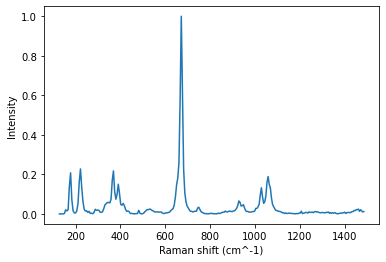

In [4]:
print(f"A Raman spectrum of {raman_mineral_names[0]}:")
plotting.plot_spectra([(x,y) for x,y in zip(model_wavenumber_values,raman_spectra[0])], legend=False)

In [5]:
print(len(raman_mineral_names), "Raman spectra loaded, each of length", len(raman_spectra[0]))
# print("wavelengths:",dict(Counter(raman_wavelengths)))
# print("minerals:",dict(Counter(raman_mineral_names)))

12311 Raman spectra loaded, each of length 266


# Crystal structures

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 [2.53523972 1.46092428 1.58500629] 0.93 0.95 1.0453884981633847
1 Li 3 6.94 [2.53523972 1.46092428 1.58500629] 0.98 0.05 1.0453884981633847
2 Al 13 26.982 [0. 0. 0.] 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 [0. 0. 0.] 1.83 0.09 0.4374208670562803
4 As 33 74.922 [-0.75421028  2.6759083   1.58500629] 2.18 1.0 0.3979424494519229
5 O 8 15.999 [0.05232366 3.70416148 2.63447066] 3.44 1.0 0.7540377762432269
6 O 8 15.999 [0.33533372 1.7275368  0.71699345] 3.44 1.0 0.6616582790490306
7 F 9 18.998 [-2.26263084  0.57040106  4.75501887] 3.98 0.73 0.5676996451506598
8 O 8 15.999 [-2.26263084  0.57040106  4.75501887] 3.44 0.27 0.5676996451506598


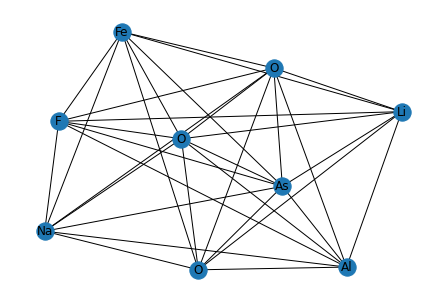

In [6]:
fp = "../data/raw/CIFs2/Durangite0019593.cif"
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,verbose=True)

In [7]:
cif_mineral_names = []
cif_graphs = []
big_cif_file_path = '../data/raw/cifdata.txt'
temp_file_path = '../data/raw/tempcif.txt'
cur_mineral_name = ''
cur_cif_lines = []
with open(big_cif_file_path,'r',errors='ignore') as f:
    for line in f:
        if line.startswith("_chemical_formula_sum ''"):
            continue
        if line.startswith('_chemical_name_mineral'):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('_amcsd_formula_title '):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('END'):
            try:
                with codecs.open(temp_file_path,'w','utf-8') as out:
                    out.write(''.join(cur_cif_lines))
                _,G = load_crystal_structures.load_single_crystal_structure(
                                                temp_file_path,
                                                min_distance_for_edge=-1,
                                                max_distance_for_edge=np.inf,
                                                )
                cif_graphs.append(G)
                cif_mineral_names.append(cur_mineral_name)
            except:
                pass
            cur_cif_lines = []
        else:
            cur_cif_lines.append(line)

12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to fin

Unexpected error:
Unexpected error:


13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
11:0: Trying to find one of data_value_1, start_sc_line
>  _journal_year 1974
>  ^
11:0:

In [8]:
# print(dict(Counter(cif_mineral_names)))

# Combine

### Decide on minerals

In [9]:
all_minerals = set(cif_mineral_names+raman_mineral_names)
cif_counter = Counter(cif_mineral_names)
raman_counter = Counter(raman_mineral_names)
minimum_number_for_each = 1
minerals_for_dataset = []
for mineral in all_minerals:
    if cif_counter[mineral] >= minimum_number_for_each and raman_counter[mineral] >= minimum_number_for_each:
        minerals_for_dataset.append(mineral)
minerals_for_dataset.remove('Diamond')
minerals_for_dataset.remove('Sulphur')
minerals_for_dataset.remove('Silicon')
print(minerals_for_dataset)
print(len(minerals_for_dataset),'/',len(all_minerals))

['Rhodochrosite', 'Thenardite', 'Andalusite', 'Eckermannite', 'Epidote', 'Fluorapatite', 'Chalcopyrite', 'Amblygonite', 'Smithsonite', 'Paravauxite', 'Aenigmatite', 'Strontianite', 'Muscovite', 'Pharmacosiderite', 'Nepheline', 'Pyrophyllite', 'Bobdownsite', 'Hardystonite', 'Brazilianite', 'Tugtupite', 'Corundum', 'Datolite', 'Magnesiofoitite', 'Enstatite', 'Chambersite', 'Vivianite', 'Olivenite', 'Siderite', 'Bikitaite', 'Azurite', 'Leucophanite', 'Petalite', 'Glauberite', 'Fluorophlogopite', 'Franciscanite', 'Creedite', 'Edingtonite', 'Paramontroseite', 'Aurichalcite', 'Goethite', 'Elbaite', 'Zwieselite', 'Monticellite', 'Akermanite', 'Pectolite', 'Pyrite', 'Osumilite', 'Staurolite', 'Mesolite', 'Stibioclaudetite', 'Ilvaite', 'Phlogopite', 'Barytocalcite', 'Celestine', 'Atacamite', 'Kurnakovite', 'Scorodite', 'Germanite', 'Astrophyllite', 'Kornerupine', 'Huntite', 'Groutite', 'Hubnerite', 'Tunellite', 'Natrolite', 'Paragonite', 'Magnetite', 'Libethenite', 'Sphalerite', 'Verplanckite',

### Pair them up

In [10]:
data_list = []
for mineral in minerals_for_dataset:
    cur_mineral_raman_indices = [i for i, x in enumerate(raman_mineral_names) if x == mineral]
    cur_mineral_graph_indices = [i for i, x in enumerate(cif_mineral_names) if x == mineral]
    for i_raman, i_graph in zip(cur_mineral_raman_indices,cur_mineral_graph_indices):
        cur_graph = pyg.utils.convert.from_networkx(cif_graphs[i_graph])
        cur_graph['y'] = raman_spectra[i_raman]
        cur_graph['mineral'] = mineral
        data_list.append(cur_graph)

C:\Users\gordon\anaconda3\envs\cs224wproj\lib\site-packages\torch_geometric\utils\convert.py:164: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  data[key] = torch.tensor(value)


In [11]:
print(len(data_list), "samples in the final dataset")
print("Each looks like:",data_list[0])

2794 samples in the final dataset
Each looks like: Data(x=[3, 5], edge_index=[2, 6], pos=[3, 3], element=[3], z=[3], dist=[6], y=[266], mineral='Rhodochrosite')


In [12]:
save_path = '../data/processed/v3.pt'
data, slices, _ = pyg.data.collate.collate(
    data_list[0].__class__,
    data_list=data_list,
    increment=False,
    add_batch=True,
)
data.x = data.x.type(torch.FloatTensor)
data.pos = data.pos.type(torch.FloatTensor)
data.dist = data.dist.type(torch.FloatTensor)
data.y = torch.stack([torch.Tensor(yi) for yi in data.y]).type(torch.FloatTensor)

collated_data = (data, slices)
torch.save(collated_data, save_path)

In [13]:
print(data)

Data(x=[30037, 5], edge_index=[2, 543514], pos=[30037, 3], element=[2794], z=[30037], dist=[543514], y=[2794, 266], mineral=[2794], batch=[30037], ptr=[2795])
